# Day 10_Exercise 4

In [2]:
%matplotlib inline 
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>()</style>'.format(css))

In [9]:
titles=pd.read_csv('titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [10]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?


In [11]:
import pandas as pd
superman_batman = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]
character_counts = superman_batman.groupby(['year', 'character']).size().unstack(fill_value=0)
superman_years = character_counts[character_counts['Superman'] > character_counts['Batman']]
num_superman_years = len(superman_years)
print(f"Number of 'Superman years' in film history: {num_superman_years}")

Number of 'Superman years' in film history: 11


# How many years have been "Batman years", with more Batman characters than Superman characters?

In [12]:
import pandas as pd
superman_batman = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]
character_counts = superman_batman.groupby(['year', 'character']).size().unstack(fill_value=0)
batman_years = character_counts[character_counts['Batman'] > character_counts['Superman']]
num_batman_years = len(batman_years)
print(f"Number of 'Batman years' in film history: {num_batman_years}")

Number of 'Batman years' in film history: 27


# Plot the number of actor roles each year and the number of actress roles each year over the history of film.

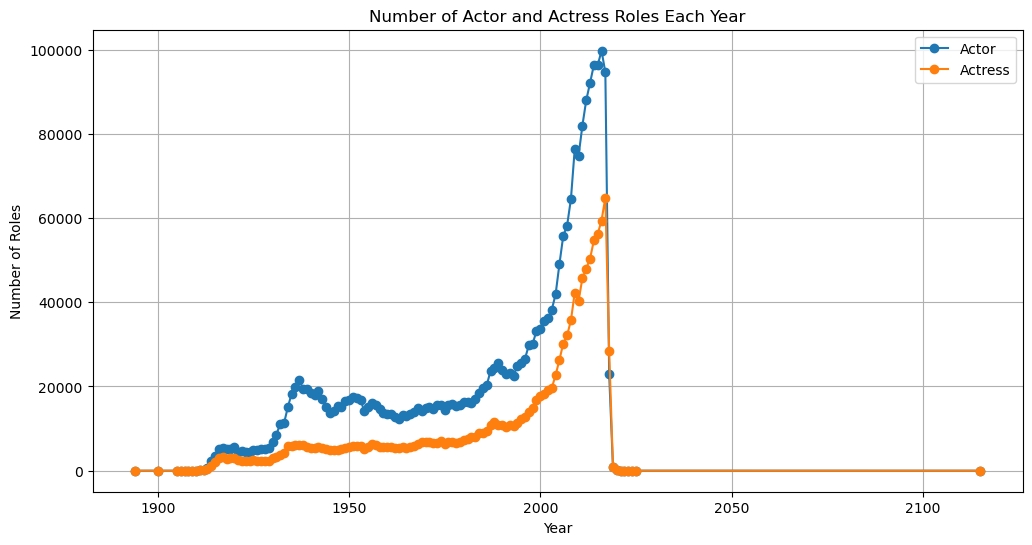

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
plt.plot(role_counts.index, role_counts['actor'], label='Actor', marker='o')
plt.plot(role_counts.index, role_counts['actress'], label='Actress', marker='o')
plt.title('Number of Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
plt.show()


# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.



<Figure size 1200x600 with 0 Axes>

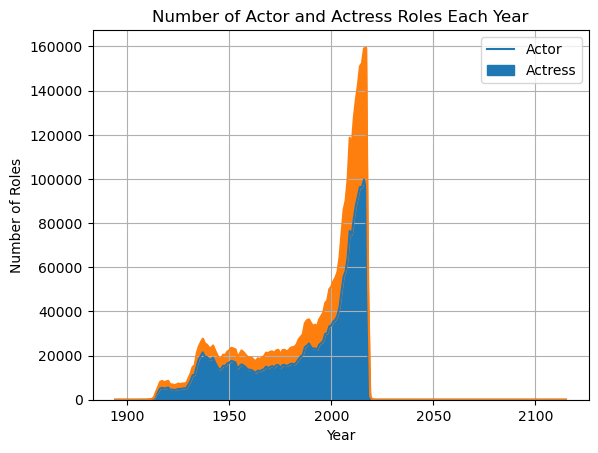

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
role_counts.plot(kind='area', stacked=True)
plt.title('Number of Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(['Actor', 'Actress'])
plt.grid(True)
plt.show()


# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.


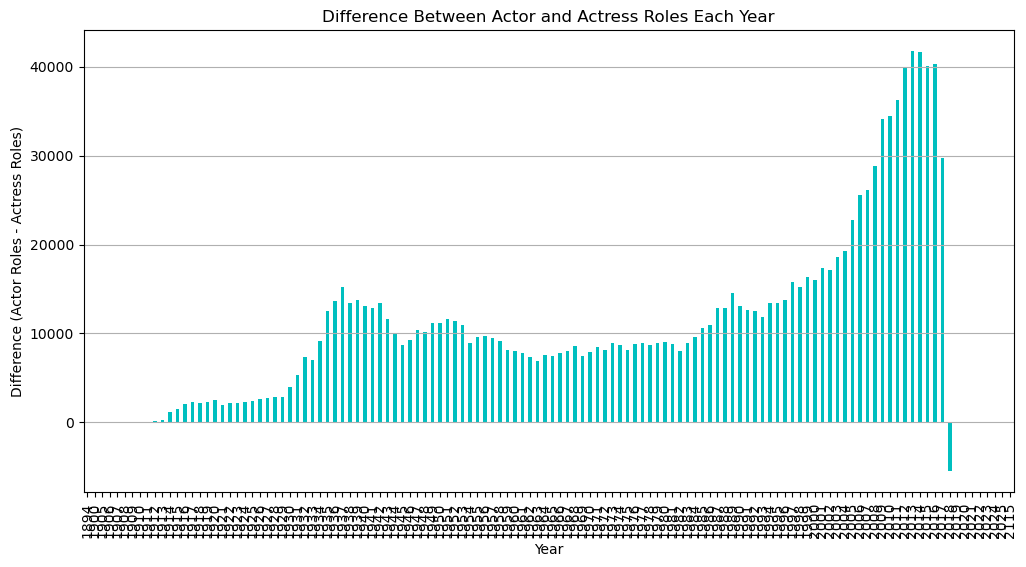

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]
role_counts = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
role_difference = role_counts['actor'] - role_counts['actress']
plt.figure(figsize=(12, 6))
role_difference.plot(kind='bar', color='c')
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.grid(axis='y')
plt.show()


# Plot the fraction of roles that have been 'actor' roles each year in the history of film.

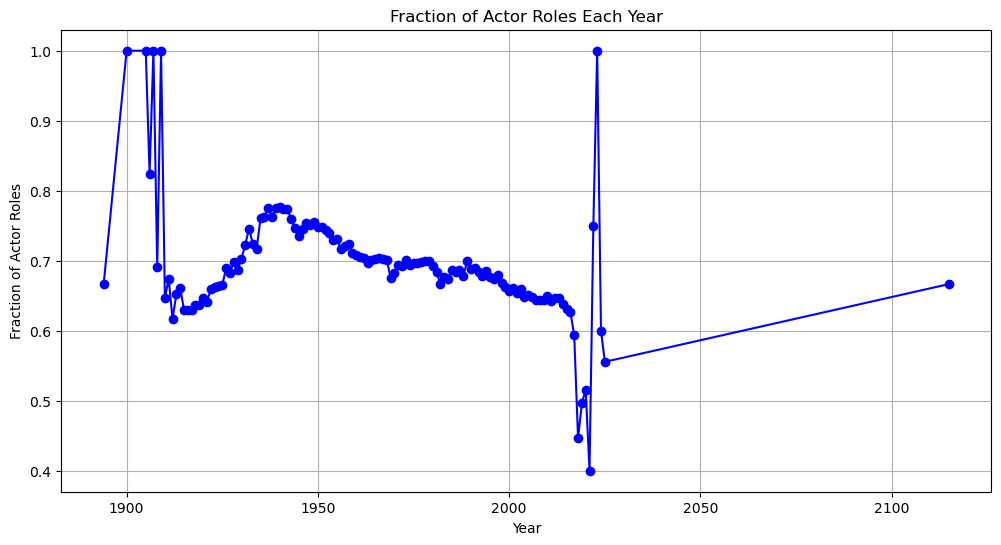

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
actor_roles = cast[cast['type'] == 'actor']
total_roles_per_year = cast.groupby('year').size()
actor_roles_per_year = actor_roles.groupby('year').size()
fraction_actor_roles = actor_roles_per_year / total_roles_per_year
plt.figure(figsize=(12, 6))
fraction_actor_roles.plot(kind='line', color='b', marker='o')
plt.title('Fraction of Actor Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.grid()
plt.show()


# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
supporting_actor_roles = cast[(cast['n'] == 2) & (cast['type'] == 'actor')]
total_supporting_roles_per_year = supporting_actor_roles.groupby('year').size()
actor_supporting_roles_per_year = supporting_actor_roles[cast['type'] == 'actor'].groupby('year').size()
fraction_actor_supporting_roles = actor_supporting_roles_per_year / total_supporting_roles_per_year
plt.figure(figsize=(12, 6))
fraction_actor_supp
sorting_roles.plot(kind='line', color='b', marker='o')
plt.title('Fraction of Actor Roles Among Supporting (n=2) Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.grid()
plt.show()


# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_cast = cast[cast['n'].isin([1, 2, 3])]
total_roles_per_year_rank = filtered_cast.groupby(['year', 'n']).size().unstack(fill_value=0)
actor_roles_per_year_rank = total_roles_per_year_rank[['actor']].rename(columns={'actor': 'actor_roles'})
fraction_actor_roles_per_year_rank = actor_roles_per_year_rank.div(total_roles_per_year_rank.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
for n in [1, 2, 3]:
    plt.plot(fraction_actor_roles_per_year_rank.index, fraction_actor_roles_per_year_rank[n], label=f'n={n}')
plt.title('Fraction of "Actor" Roles for Ranks n=1, n=2, and n=3 Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.legend()
plt.grid()
plt.show()
